In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

In [2]:
df=pd.read_csv("C:\\Users\\rajpu\\Downloads\\Buy_Data.csv.xls")

In [3]:
df

,Unnamed: 0,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,1,11,11,1200,111,15000,Bedroom House,8th Phase JP Nagar,18000000
2,2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,4,11,11,1973,183,8750,Bedroom House,Chikkalasandra,35000000
...,...,...,...,...,...,...,...,...,...
2518,2745,2,2,945,88,7089,Apartment,KR Puram,6700000
2519,2746,2,2,810,75,6790,Apartment,Marathahalli,5500000
2520,2747,2,2,1405,131,7117,Apartment,Bommanahalli,10000000
2521,2748,0,0,1200,111,3500,Residential land / Plot,Chikkabanavar,4200000


In [4]:
df['Type_of_Land'] = df['Type_of_Land'].str.replace('\W', '', regex=True)
df.head(25)

,Unnamed: 0,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,1,11,11,1200,111,15000,BedroomHouse,8th Phase JP Nagar,18000000
2,2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,4,11,11,1973,183,8750,BedroomHouse,Chikkalasandra,35000000
5,5,5,5,3500,325,21428,BedroomHouse,Chandra Layout,75000000
6,6,3,3,2300,214,13043,Apartment,Spencer Road,30000000
7,7,2,2,1150,107,5391,Apartment,CV Raman Nagar,6200000
8,8,5,5,3500,325,3429,BedroomHouse,Suragajakkanahalli,14000000
9,9,2,2,1065,99,6568,Apartment,6th Block Jayanagar,6995000


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,11,11,1200,111,15000,BedroomHouse,8th Phase JP Nagar,18000000
2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,11,11,1973,183,8750,BedroomHouse,Chikkalasandra,35000000
...,...,...,...,...,...,...,...,...
2518,2,2,945,88,7089,Apartment,KR Puram,6700000
2519,2,2,810,75,6790,Apartment,Marathahalli,5500000
2520,2,2,1405,131,7117,Apartment,Bommanahalli,10000000
2521,0,0,1200,111,3500,ResidentiallandPlot,Chikkabanavar,4200000


In [7]:
df['Type_of_Land']=df['Type_of_Land'].map({'Apartment':1,'BedroomHouse':2,'ResidentiallandPlot':3})
df

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,959,89,4171,1.0,Maruthi Nagar,4200000
1,11,11,1200,111,15000,2.0,8th Phase JP Nagar,18000000
2,3,3,2189,203,10507,1.0,CV Raman Nagar,23000000
3,2,2,1165,108,5579,1.0,CV Raman Nagar,6500000
4,11,11,1973,183,8750,2.0,Chikkalasandra,35000000
...,...,...,...,...,...,...,...,...
2518,2,2,945,88,7089,1.0,KR Puram,6700000
2519,2,2,810,75,6790,1.0,Marathahalli,5500000
2520,2,2,1405,131,7117,1.0,Bommanahalli,10000000
2521,0,0,1200,111,3500,3.0,Chikkabanavar,4200000


In [8]:
df = df.dropna()

In [9]:
# Resetting the indices using df.reset_index()
df = df.reset_index(drop=True)
 
df

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,959,89,4171,1.0,Maruthi Nagar,4200000
1,11,11,1200,111,15000,2.0,8th Phase JP Nagar,18000000
2,3,3,2189,203,10507,1.0,CV Raman Nagar,23000000
3,2,2,1165,108,5579,1.0,CV Raman Nagar,6500000
4,11,11,1973,183,8750,2.0,Chikkalasandra,35000000
...,...,...,...,...,...,...,...,...
2503,2,2,945,88,7089,1.0,KR Puram,6700000
2504,2,2,810,75,6790,1.0,Marathahalli,5500000
2505,2,2,1405,131,7117,1.0,Bommanahalli,10000000
2506,0,0,1200,111,3500,3.0,Chikkabanavar,4200000


In [10]:
df['Type_of_Land'] = df['Type_of_Land'].apply(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               2508 non-null   int64 
 1   Baths             2508 non-null   int64 
 2   Total_Area_SqFt   2508 non-null   int64 
 3   BuiltUp_Area_Sqm  2508 non-null   int64 
 4   Price_per_SqFt    2508 non-null   int64 
 5   Type_of_Land      2508 non-null   int64 
 6   Location          2508 non-null   object
 7   Price             2508 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 156.9+ KB


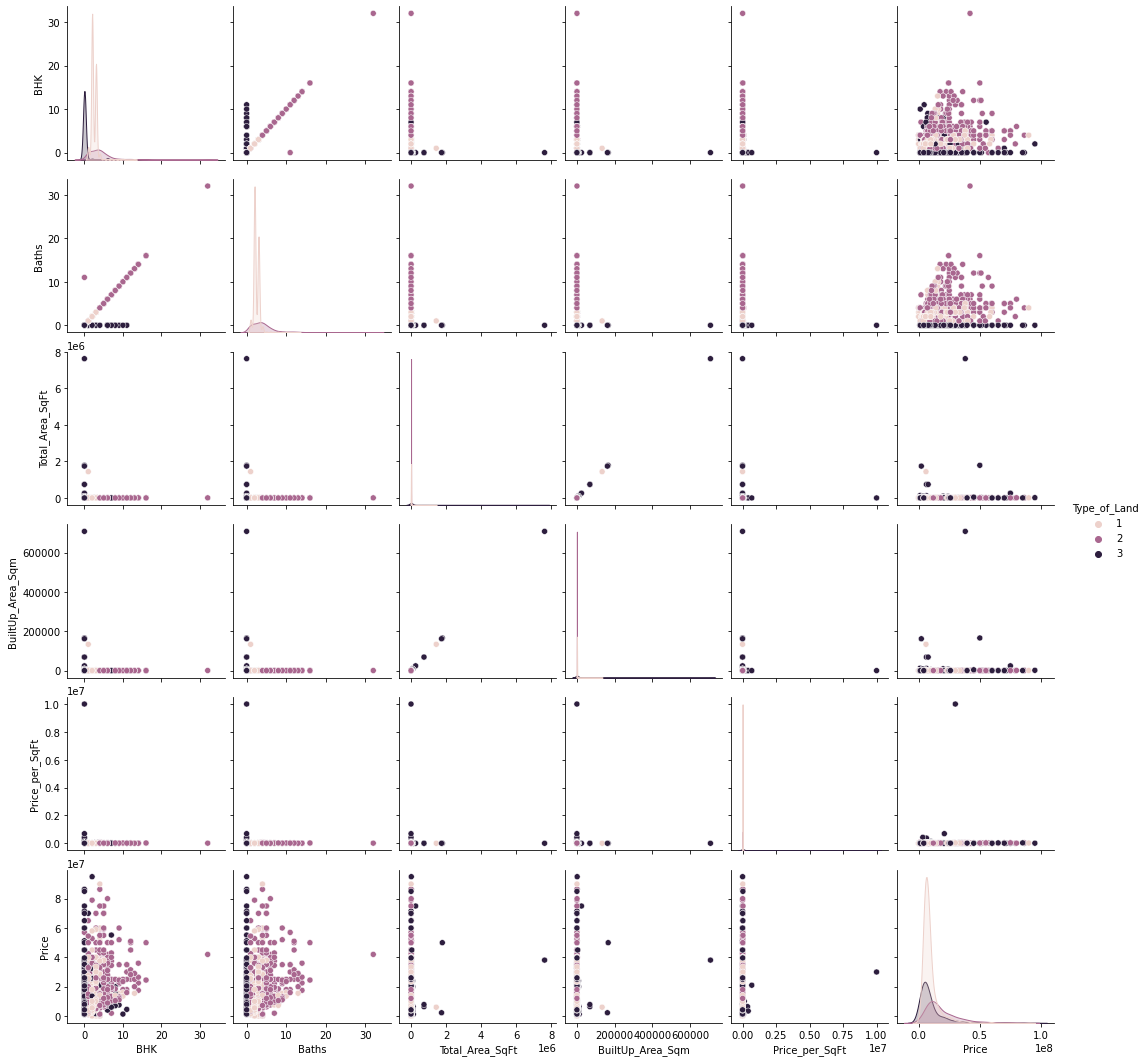

In [12]:
import seaborn as sns
sns.pairplot(data=df,hue='Type_of_Land')

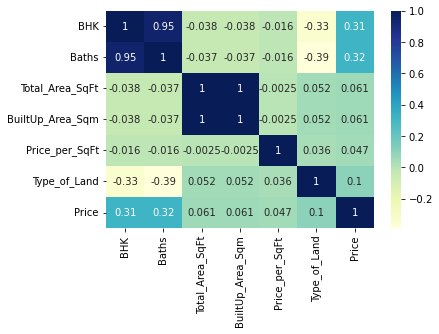

In [13]:
plot=sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

<AxesSubplot:>

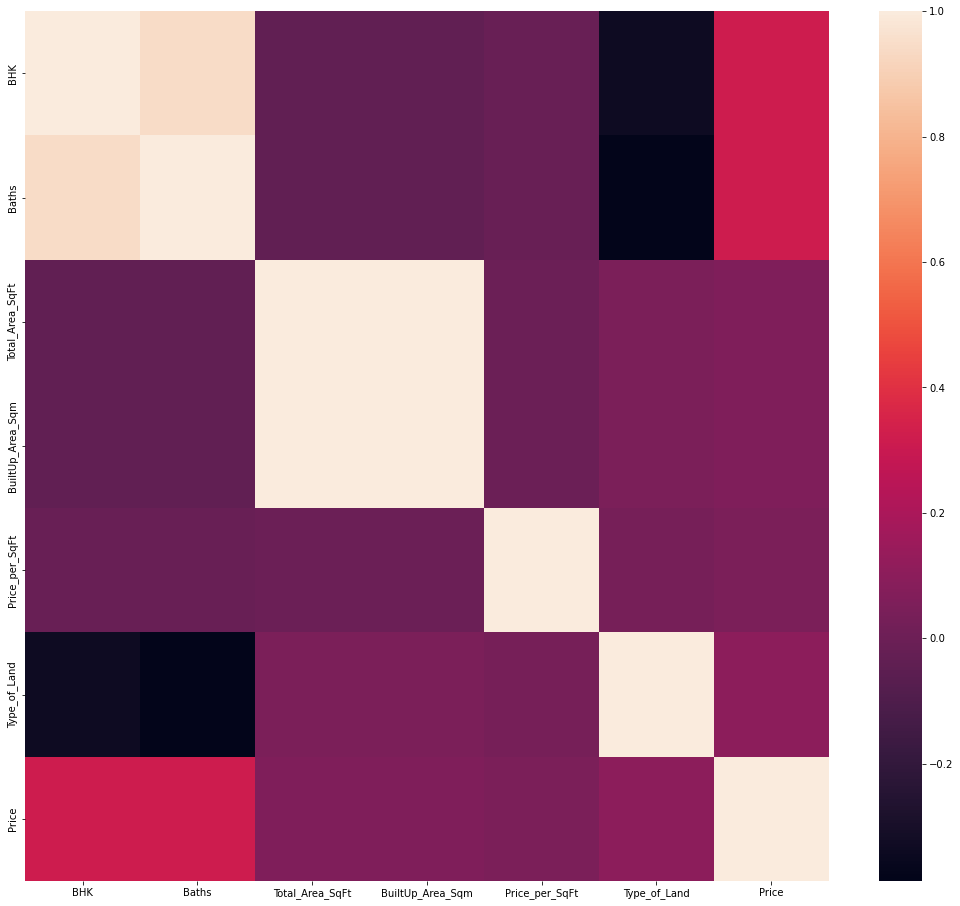

In [14]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr())

In [15]:
#df1=df.drop(['Location'],axis=1)
df1=df

In [16]:
X=df1.drop(['Location'],axis=1)
y=df1['Price']

In [17]:
X

,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Price
0,2,2,959,89,4171,1,4200000
1,11,11,1200,111,15000,2,18000000
2,3,3,2189,203,10507,1,23000000
3,2,2,1165,108,5579,1,6500000
4,11,11,1973,183,8750,2,35000000
...,...,...,...,...,...,...,...
2503,2,2,945,88,7089,1,6700000
2504,2,2,810,75,6790,1,5500000
2505,2,2,1405,131,7117,1,10000000
2506,0,0,1200,111,3500,3,4200000


In [18]:
y

0        4200000
1       18000000
2       23000000
3        6500000
4       35000000
          ...   
2503     6700000
2504     5500000
2505    10000000
2506     4200000
2507    12000000
Name: Price, Length: 2508, dtype: int64

## Fitting Random Forest Regression to the dataset, import the regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 100, random_state =42)
regressor.fit(X, y) 

RandomForestRegressor(random_state=42)

## Bagging

In [20]:
from sklearn.model_selection import KFold, cross_val_score

In [21]:
kfold = KFold(n_splits = 10, random_state = 42,shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = 20, random_state = 42)

In [22]:
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8839649402390439


## Random Forest Classification

In [23]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')


In [24]:
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.7898677290836653


## splitting data set into train and test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) 

In [26]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20,max_depth=3,random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [27]:
y_pred

array([ 4130079.15767626, 12808240.63157764,  7862926.2054741 ,
       17303414.83116199, 12527079.62862233,  4130079.15767626,
        4130079.15767626,  4130079.15767626,  7862926.2054741 ,
       12527079.62862233,  4130079.15767626, 13551568.83294212,
        7862926.2054741 ,  7862926.2054741 ,  7862926.2054741 ,
        4130079.15767626, 36372076.08632004, 25806905.99293465,
        4130079.15767626, 12527079.62862233,  4130079.15767626,
       20475781.53373279,  4130079.15767626,  7862926.2054741 ,
        7862926.2054741 ,  4130079.15767626, 55151046.29408453,
       12808240.63157764, 12808240.63157764, 18240889.92029244,
        5233742.13715797, 17303414.83116199, 18956261.56956306,
        7862926.2054741 ,  4130079.15767626,  8264885.63331404,
       54124495.56727294,  7862926.2054741 , 12527079.62862233,
        4130079.15767626,  4130079.15767626,  7862926.2054741 ,
        4130079.15767626,  4130079.15767626,  7862926.2054741 ,
        7862926.2054741 ,  7862926.20547

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1082714.6228878077
Mean Squared Error: 2027152920230.8035
Root Mean Squared Error: 1423781.2051824548


## Saving model as Pickle String

In [29]:
import pickle
#pickling is the process where python object hierarchy is converted into a byte stream

#the model is then created as an object

In [30]:
# "rb" mode opens the file in binary format for reading,
# "wb" mode opens the file in binary format for writing

In [31]:
pickle.dump(rfr,open("randomforest.pkl","wb"))

In [32]:
pickle_out=open("randomforest.pkl","wb")
pickle.dump(rfr,pickle_out)
loaded_model=pickle.load(open("randomforest.pkl","rb"))
result=loaded_model.score(X_test, y_test)

In [33]:
print(result)

0.9844944087420868
